In [57]:
#引入所需要的全部包
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import time

In [58]:
##设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [59]:
#加载数据
#日期，时间，有功功率，无功功率，电压，电流，厨房电功率，洗衣服用功率，热水器用功率
path1='datas/household_power_consumption_1000.txt'
df = pd.read_csv(path1, sep=';',low_memory=False)#没有混合类型的时候可以通过low_memory=False调用更多内存，加快效率

In [60]:
df.head()#查看前五行的数据

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [61]:
#查看格式信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Date                     1000 non-null object
Time                     1000 non-null object
Global_active_power      1000 non-null float64
Global_reactive_power    1000 non-null float64
Voltage                  1000 non-null float64
Global_intensity         1000 non-null float64
Sub_metering_1           1000 non-null float64
Sub_metering_2           1000 non-null float64
Sub_metering_3           1000 non-null float64
dtypes: float64(7), object(2)
memory usage: 70.4+ KB


In [62]:
#异常数据的处理（异常数据过滤）
new_df = df.replace('?', np.nan) #非法字符'?'转为np.nan
datas = new_df.dropna(axis=0, how='any')#只要有一个数据为空，就进行行删除操作
datas.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.0,1000.000000,1000.000000
mean,2.418772,0.089232,240.03579,10.351000,0.0,2.749000,5.756000
std,1.239979,0.088088,4.08442,5.122214,0.0,8.104053,8.066941
min,0.206000,0.000000,230.98000,0.800000,0.0,0.000000,0.000000
25%,1.806000,0.000000,236.94000,8.400000,0.0,0.000000,0.000000
50%,2.414000,0.072000,240.65000,10.000000,0.0,0.000000,0.000000
75%,3.308000,0.126000,243.29500,14.000000,0.0,1.000000,17.000000
max,7.706000,0.528000,249.37000,33.200000,0.0,38.000000,19.000000


In [63]:
#查看格式信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Date                     1000 non-null object
Time                     1000 non-null object
Global_active_power      1000 non-null float64
Global_reactive_power    1000 non-null float64
Voltage                  1000 non-null float64
Global_intensity         1000 non-null float64
Sub_metering_1           1000 non-null float64
Sub_metering_2           1000 non-null float64
Sub_metering_3           1000 non-null float64
dtypes: float64(7), object(2)
memory usage: 70.4+ KB


In [64]:
## 创建一个时间函数格式化 字符串
print(' '.join(['123','456']))#以空格的间隔，把一个list中的两个字符串连接起来

def data_format(dt):
    t = time.strptime(' '.join(dt), '%d/%m/%Y %H:%M:%S') #
    return (t.tm_year, t.tm_mon, t.tm_mday, t.tm_hour, t.tm_min, t.tm_sec)

123 456


In [65]:
#获取x和y变量，并将时间转换为数值连续变量
X = datas.iloc[:, 0:2]
X = X.apply(lambda x : pd.Series(data_format(x)), axis=1)
Y = datas['Global_active_power']

In [66]:
X.head(2)

,0,1,2,3,4,5
0,2006,12,16,17,24,0
1,2006,12,16,17,25,0


In [67]:
## 对数据集进行测试集和训练集的划分
# X： 特征矩阵（一般为DataFrame）
# Y：特征对应的Label标签（类型一般是Series）
# test_size: 对X/Y进行划分的时候，测试集合测试集合的数据占比，是一个（0，1）之间的float类型的值
#random_state：数据分割是基于随机器进行分割的，该参数给定随机种子，保证每次分割所产生的数据集是完全相同的
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [68]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

(800, 6)
(200, 6)
(800,)


In [69]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
0,800.0,2006.00000,0.000000,2006.0,2006.0,2006.0,2006.0,2006.0
1,800.0,12.00000,0.000000,12.0,12.0,12.0,12.0,12.0
2,800.0,16.59875,0.490458,16.0,16.0,17.0,17.0,17.0
3,800.0,10.75500,8.068386,0.0,4.0,8.0,19.0,23.0
4,800.0,29.72375,17.266517,0.0,15.0,30.0,45.0,59.0
5,800.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0


In [70]:
## 数据标准化
# StandardScaler：将数据转换为标准差为1的数据集（有一个数据的映射）
# 如果API名字中有fit：那么就有模型训练的含义
# 如果API名字中有transform，那么就表示对数据具有转换的含义操作
# 如果API中有predict，那么就表示进行数据预测，会有一个预测结果输出
ss = StandardScaler()
X_train = ss.fit_transform(X_train) # 训练并转换
X_test  = ss.transform(X_test) ## 直接使用在模型构建数据上进行一个数据标准化操作

In [71]:
DataFrame(X_train).describe().T

,count,mean,std,min,25%,50%,75%,max
0,800.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,800.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,800.0,2.050582e-15,1.000626,-1.221561,-1.221561,0.818625,0.818625,0.818625
3,800.0,-5.107026e-17,1.000626,-1.333814,-0.837742,-0.341670,1.022529,1.518601
4,800.0,5.329071e-17,1.000626,-1.722545,-0.853268,0.016009,0.885286,1.696611
5,800.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [72]:
## 模型训练
lr = LinearRegression()
lr.fit(X_train, Y_train) #训练模型
## 对测试集数据进行预测
y_predict = lr.predict(X_test) ##预测结果

print('训练集R2：',lr.score(X_train, Y_train))
print('测试集R2：',lr.score(X_test, Y_test))
mse = np.average((y_predict -  Y_test)**2) #求误差平方和
rmse = np.sqrt(mse)
print('rmse:', rmse)

训练集R2： 0.24409311805909026
测试集R2： 0.12551628513735824
rmse: 1.164092345973625


In [73]:
## 模型保存与持久化
# 在机器学习部署的时候，实际上其中一种方式就是将模型进行输出；另外一种方式就是直接将预测结果输出
# 模型输出一般是将模型输出到磁盘文件
from sklearn.externals import joblib

joblib.dump(ss, 'data_ss.model') ##将标准化模型保存
joblib.dump(lr, 'data_lr.model') ## 模型保存

ss = joblib.load("data_ss.model")## 加载模型
lr = joblib.load("data_lr.model")## 加载模型

In [74]:
# 使用加载模型，对自定义的数据进行预测
data1 = [[2006, 12, 17, 12, 25, 0]]
data1 = ss.transform(data1)
print(data1)
lr.predict(data1)

[[ 0.          0.          0.81862454  0.15440249 -0.27374978  0.        ]]


array([1.16996393])

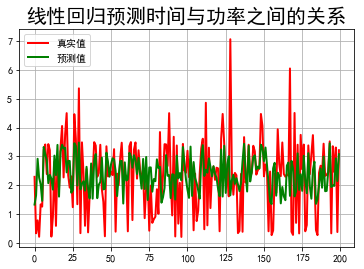

In [75]:
## 预测值和实际值画图比较
t = np.arange(len(X_test))
plt.figure(facecolor='w')#建一个画布， facecolor是背景色
plt.plot(t, Y_test, 'r-', linewidth=2, label='真实值')
plt.plot(t, y_predict, 'g-', linewidth=2, label='预测值')
plt.legend(loc='upper left')#显示图例，设置图例的位置
plt.title("线性回归预测时间与功率之间的关系", fontsize=20)
plt.grid(b=True)#加网路
plt.show()

电流预测准确率:  0.9920420609708968
电流参数: [5.07744316 0.07191391]


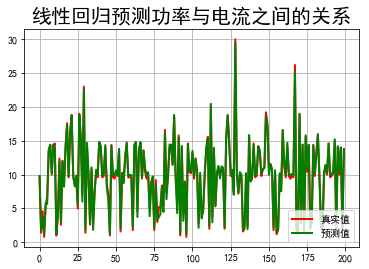

In [80]:
## 功率和电流之间的关系
X = datas.iloc[:,2:4]
Y2 = datas.iloc[:,5]

## 数据分割
X2_train,X2_test,Y2_train,Y2_test = train_test_split(X, Y2, test_size=0.2, random_state=0)

## 数据归一化
scaler2 = StandardScaler()
X2_train = scaler2.fit_transform(X2_train) # 训练并转换
X2_test = scaler2.transform(X2_test) ## 直接使用在模型构建数据上进行一个数据标准化操作 

## 模型训练
lr2 = LinearRegression()
lr2.fit(X2_train, Y2_train) ## 训练模型

## 结果预测
Y2_predict = lr2.predict(X2_test)

## 模型评估
print("电流预测准确率: ", lr2.score(X2_test,Y2_test))
print("电流参数:", lr2.coef_)

## 绘制图表
#### 电流关系
t=np.arange(len(X2_test))
plt.figure(facecolor='w')
plt.plot(t, Y2_test, 'r-', linewidth=2, label=u'真实值')
plt.plot(t, Y2_predict, 'g-', linewidth=2, label=u'预测值')
plt.legend(loc = 'lower right')
plt.title(u"线性回归预测功率与电流之间的关系", fontsize=20)
plt.grid(b=True)
plt.show()

In [79]:
print(X.head())
print(Y.head())

   Global_active_power  Global_reactive_power
0                4.216                  0.418
1                5.360                  0.436
2                5.374                  0.498
3                5.388                  0.502
4                3.666                  0.528
0    4.216
1    5.360
2    5.374
3    5.388
4    3.666
Name: Global_active_power, dtype: float64
